In [1]:
filename = "call-center-example.csv"

In [2]:
import numpy as np
import pandas as pd

In [16]:
df = pd.read_csv(filename, parse_dates={"start":["Date", "Time"]})

In [15]:
print(f"Minimum duration = {df['Duration'].min()} second(s).")
print(f"Maximum duration = {df['Duration'].max()} second(s).")
print(f"Average duration = {df['Duration'].mean():.3f} second(s).") #:.3f -> precision of 3 decimals

Minimum duration = 171 second(s).
Maximum duration = 1117 second(s).
Average duration = 637.600 second(s).


In [20]:
start = df["start"]
stop = start + pd.to_timedelta(df["Duration"],unit='s')

In [38]:
m = start.min()
i = start[start==m].index[0]

In [40]:
df = pd.concat([pd.DataFrame({"When": m, "Start": 0}, index=[i]), pd.DataFrame({"When": start, "Start": 1}), pd.DataFrame({"When": stop, "Start": -1})])

In [41]:
df = df.sort_values(by=["When", "Start"])

In [44]:
df["Count"] = df["Start"].cumsum()

In [45]:
print("Maximum concurrent calls = {} call(s)".format(df["Count"].max()))

Maximum concurrent calls = 4 call(s)


In [46]:
import matplotlib.pyplot as plt

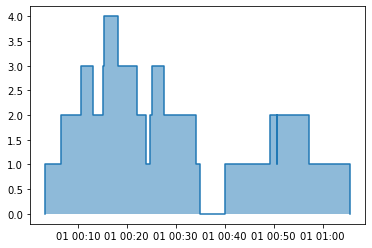

In [50]:
plt.step(df['When'], df['Count'], where='post')
plt.fill_between(df['When'], df['Count'], step='post', alpha=0.5)
plt.savefig('diagram.png', bbox_inches='tight')